## 1. Context methods

In this case value of pixel depends on values of pixels arount main one.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

pd.options.display.float_format = "{:.2f}".format 

In [6]:
def display(img, title = '', axes = False, opencv = True):
    '''
    function display image in color or grey scale
    '''
    if not(axes):
        plt.axis("off") 
    if img.ndim == 2:
        plt.imshow(img,cmap='gray')
    else:
        if opencv:
            plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img)
    plt.title(title)


def display_list(imglist, k_num = 1, titlelist = [], opencv = True, dpi = 100, axes = False):
    '''
    function display list of images
    '''
    img_size = 5
    num = len(imglist)
    if len(titlelist) == 0:
        titlelist = [' ']*num
    w_num = np.ceil(num / k_num).astype(int)
    figsize_k = img_size*k_num
    figsize_w = img_size*w_num
    plt.figure(figsize=(figsize_k,figsize_w), dpi = dpi)
    for i in range(0,num):
        if isinstance(imglist[i],np.ndarray):
            plt.subplot(w_num,k_num,i+1)
            display(imglist[i],titlelist[i],axes,opencv)
    plt.show()

## 2. Linear low-pass filters

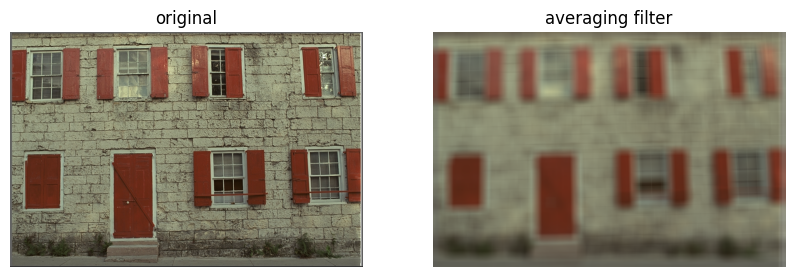

In [12]:
# averaging filter
img = cv2.imread('images/kodim01.png')
neigbourhood = 11
mask = neigbourhood*2 + 1
ret = cv2.blur(img,(mask, mask))
display_list([img,ret],2,['original','averaging filter'])

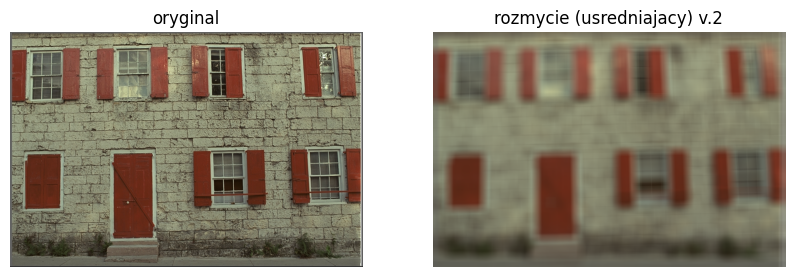

In [14]:
img = cv2.imread('images/kodim01.png')
neigbourhood = 11
mask = neigbourhood*2 + 1
mask = np.ones((mask,mask),np.float32)/(mask * mask)
ret = cv2.filter2D(img,-1,mask)
display_list([img,ret],2,['original','avg. v2'])

Main pixel has bigger weight than neigbourhood

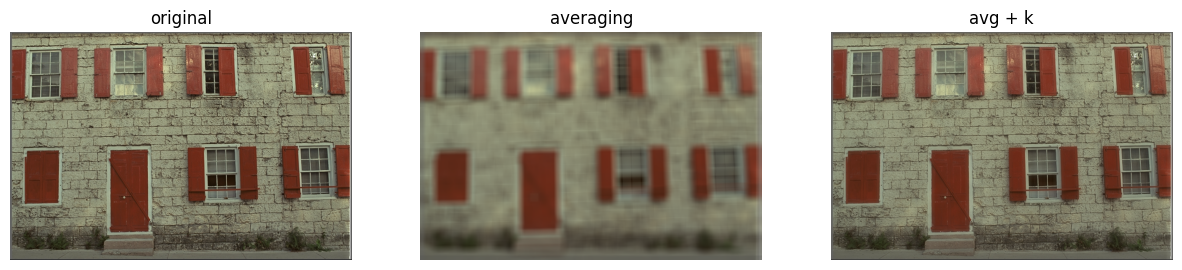

In [15]:
img = cv2.imread('images/kodim01.png')

k = 1000
niegbourhood = 9
mask_size = niegbourhood*2 + 1
mask = np.ones((mask_size, mask_size),np.float32)
mask0 = mask/sum(sum(mask))
mask[niegbourhood, niegbourhood] = k
mask = mask/sum(sum(mask))

wynik0 = cv2.filter2D(img,-1,mask0)
ret = cv2.filter2D(img,-1,mask)
display_list([img,wynik0,ret],3,['original', 'averaging', 'avg + k'])

Limiting the mask size to only one direction allows you to achieve the directional blur effect typical of a camera shake effect.

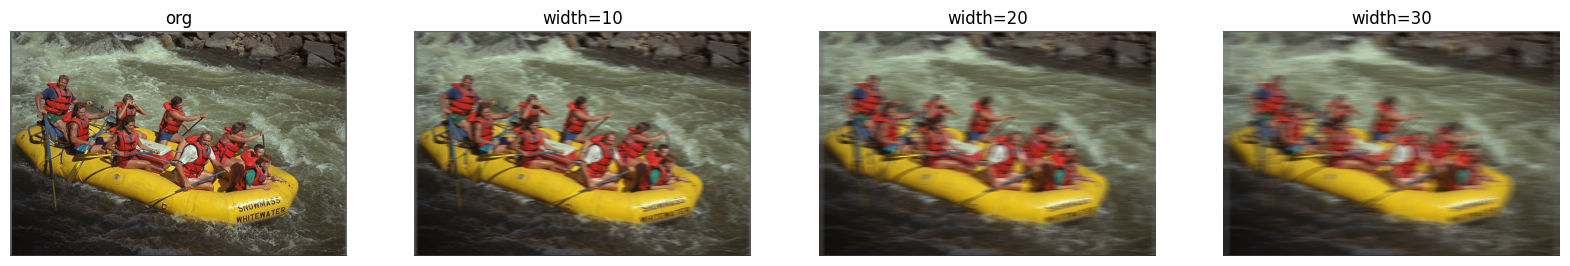

In [16]:
img = cv2.imread('images/kodim14.png')
lio = [img]
lin = ['org']
for i in range(1,4):
    lio.append(cv2.blur(img,(i*10,1)))
    lin.append("width="+str(i*10))
display_list(lio,4,lin)

Gaussian filter

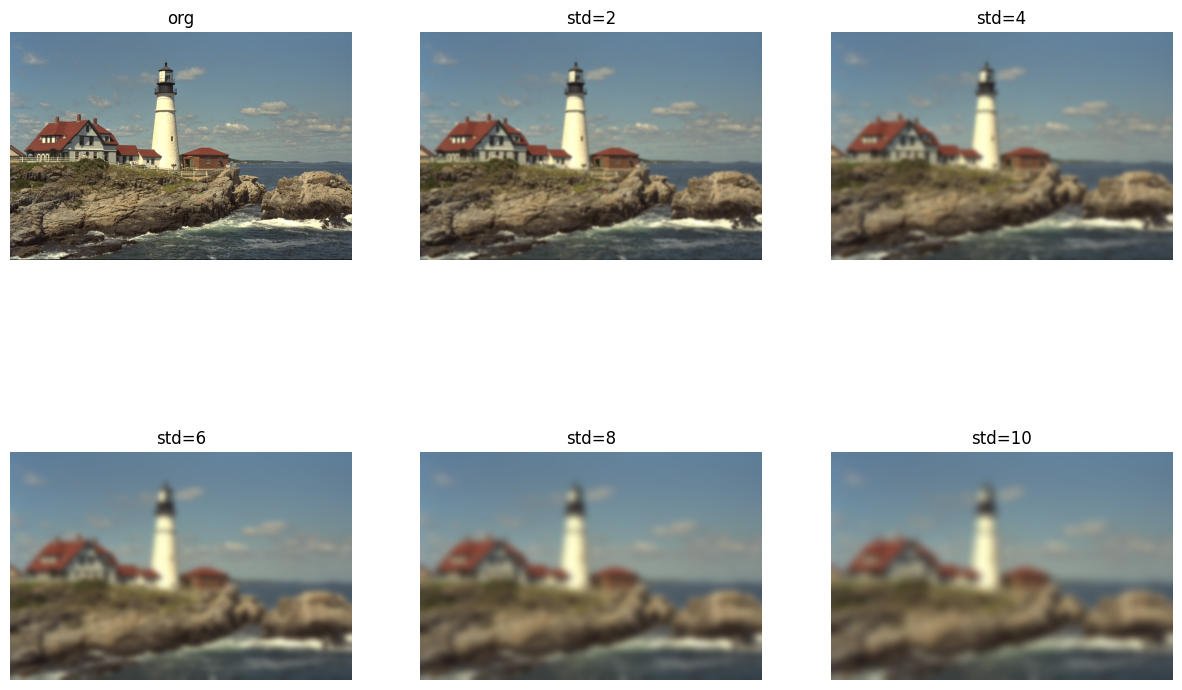

In [17]:
neghbourhood = 19
mask = neghbourhood*2 + 1
img = cv2.imread('images/kodim21.png')
lio = [img]
lin = ['org']

for i in range(1,6):
    lio.append(cv2.GaussianBlur(img,(mask,mask),i*2))
    lin.append("std="+str(i*2))
display_list(lio,3,lin)

blur = cv2.GaussianBlur(img,(width,height), bordertype)
<br>img - source
<br>img width and height - blur effect
<br>img bordertype - way of displaying borders

## 3. Linear high-pass filters

Sobel filters are used to detect edges in an image.

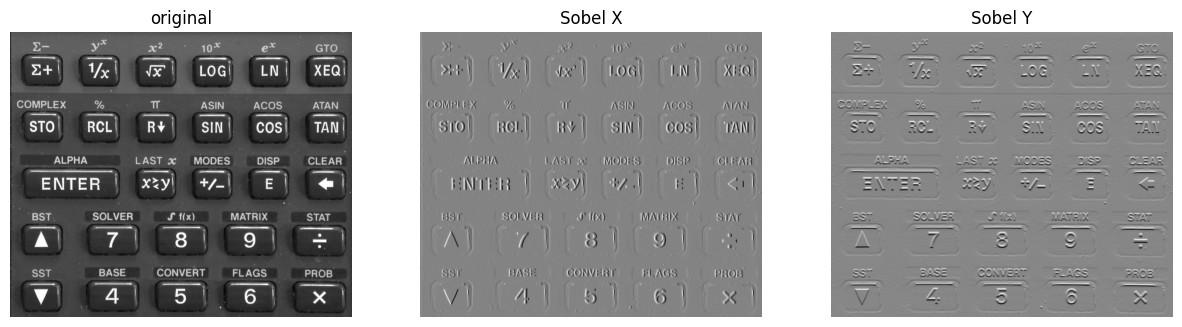

In [21]:
img = cv2.imread('images/calc.png',0)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1)
display_list([img,sobelx,sobely],3,['original','Sobel X','Sobel Y'])

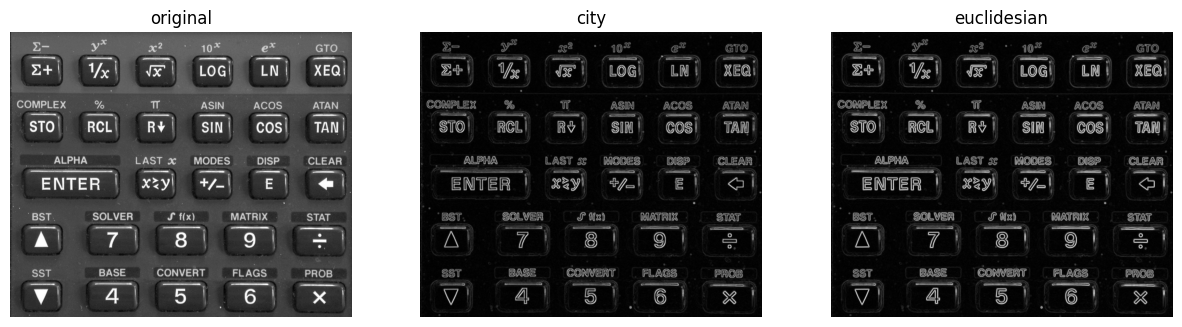

In [23]:
img = cv2.imread('images/calc.png',0)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1)
display_list([img,abs(sobelx) + abs(sobely), np.sqrt(sobelx*sobelx + sobely*sobely)],3,['original','city','euclidesian'])

Detecting noise in the image

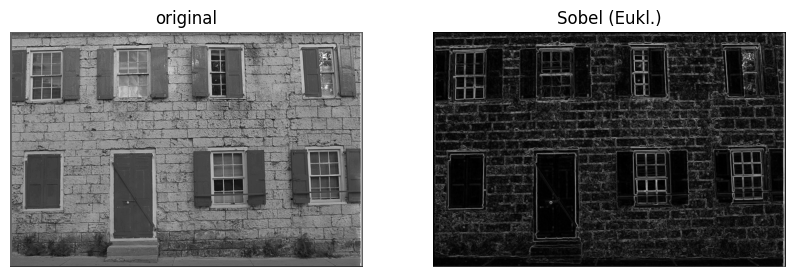

In [26]:
img = cv2.imread('images/kodim01.png',0)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1)
gradient = np.sqrt(sobelx*sobelx + sobely*sobely)
display_list([img,gradient],2,['original','Sobel (Eukl.)'])

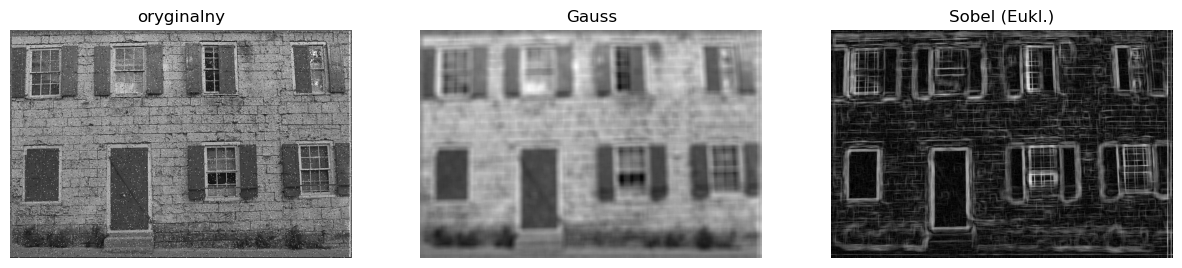

In [ ]:
obr = cv2.imread('images/kodim01.png',0)

rozmycie = 10
sasiedztwo = 7
obr2 = cv2.GaussianBlur(obr,(sasiedztwo*2 + 1,sasiedztwo*2 + 1),rozmycie)

sobelx = cv2.Sobel(obr2,cv2.CV_64F,1,0)
sobely = cv2.Sobel(obr2,cv2.CV_64F,0,1)
gradient = np.sqrt(sobelx*sobelx + sobely*sobely)
display_list([obr,obr2,gradient],3,['original','Gauss','Sobel (Eukl.)'])

**Laplasjan** vs **Sobel filter**

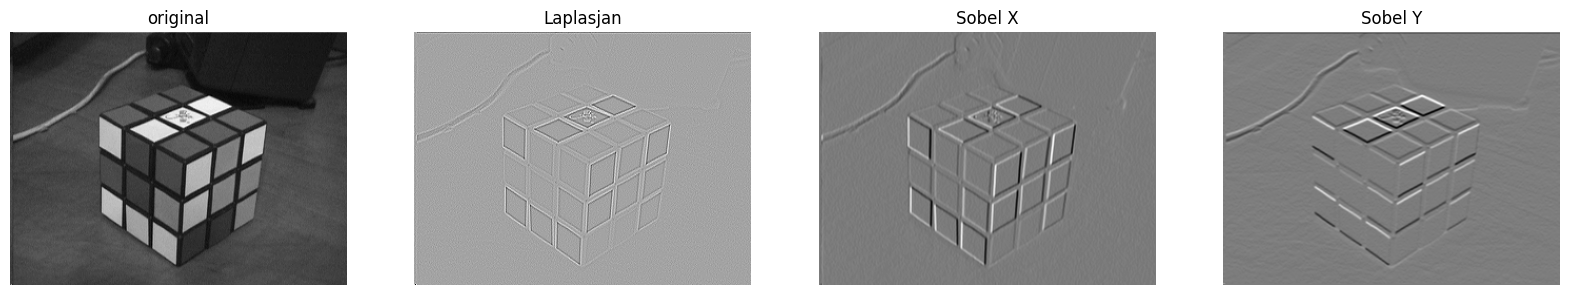

In [29]:
img = cv2.imread('images/cube.bmp',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1)
display_list([img,laplacian,sobelx,sobely],4,['original','Laplasjan','Sobel X','Sobel Y'])

Laplacian uses only the symmetric properties of the image and detects its edges using the second derivative
<br>Sobel uses two first derivative matrices, which makes the effects almost three-dimensional.

The Laplacian is also slightly preceded by a low-pass filter. The most popular combination is the combination of the Laplacian with a Gaussian filter preceding it. Such a filter is called a LoG (Laplacian-of-Gaussian) filter.

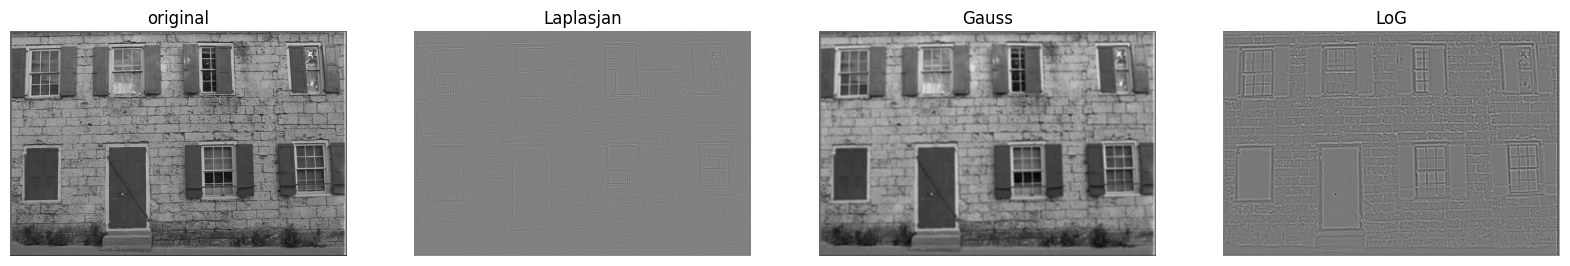

In [30]:
img = cv2.imread('images/kodim01.png',0)
neigh = 2
mask = neigh*2 + 1
laplacian = cv2.Laplacian(img,cv2.CV_64F)
gauss = cv2.GaussianBlur(img,(mask,mask),3)
log = cv2.Laplacian(gauss,cv2.CV_64F)
display_list([img,laplacian,gauss,log],4,['original','Laplasjan','Gauss','LoG'])

Laplacian is also used to improve image contrast.

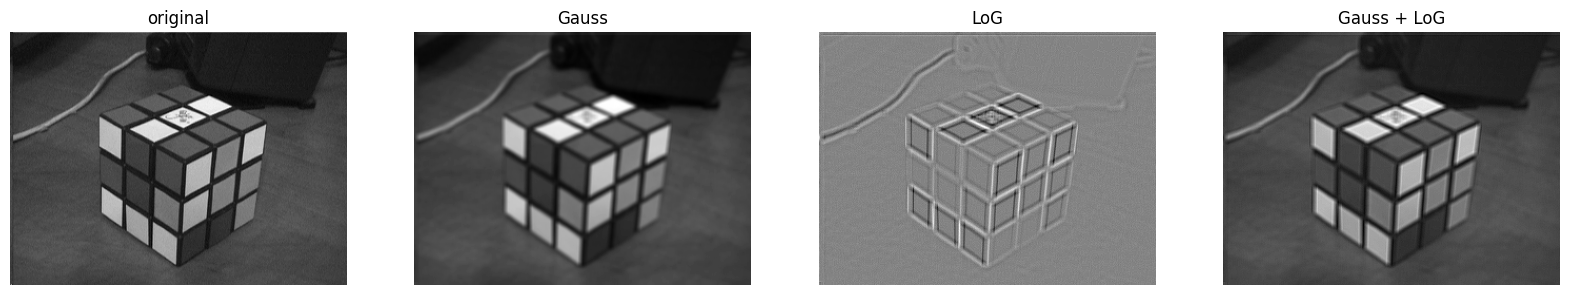

In [31]:
img = cv2.imread('images/cube.bmp',0)
neigh = 2
mask = neigh*2 + 1
gauss = cv2.GaussianBlur(img,(mask,mask),3)
laplacian = cv2.Laplacian(gauss,cv2.CV_64F)
display_list([img,gauss,laplacian,gauss-laplacian],4,['original','Gauss','LoG','Gauss + LoG'])

## 4. Median filter

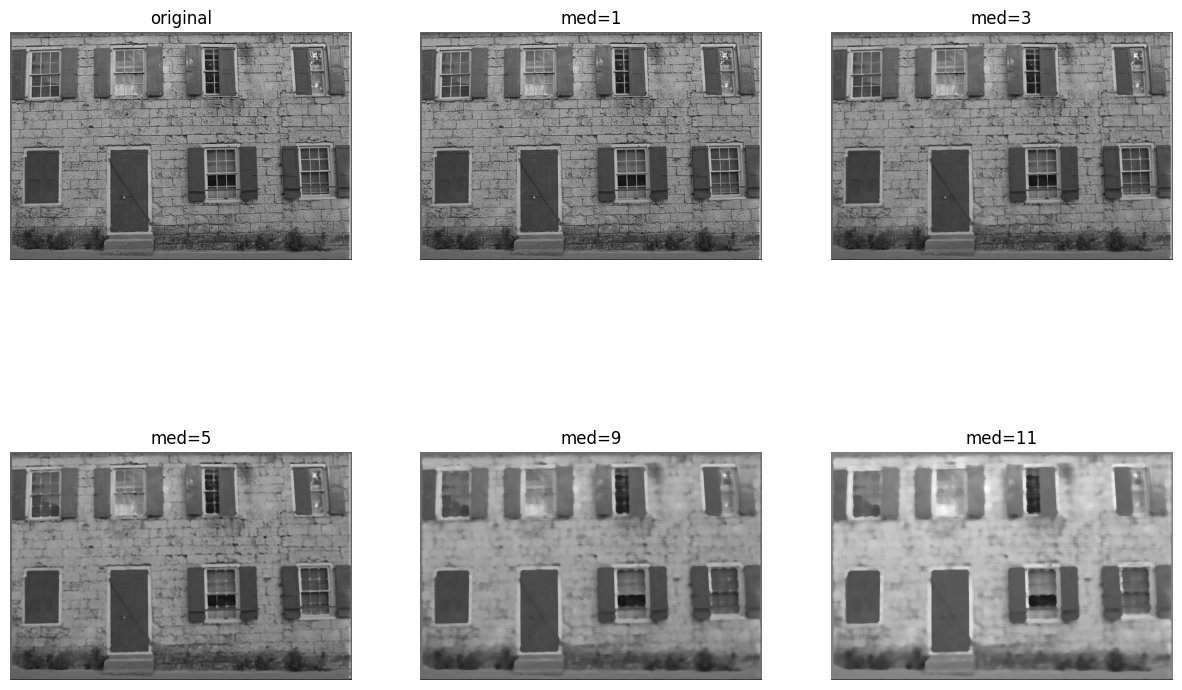

In [34]:
img = cv2.imread('images/kodim01.png',0)
lio = [img]
lin = ['original']
sizes = [1,3,5,9,11]
for i in range(0,len(sizes)):
    lio.append(cv2.medianBlur(img,sizes[i]))
    lin.append("med="+str(sizes[i]))
display_list(lio,3,lin)

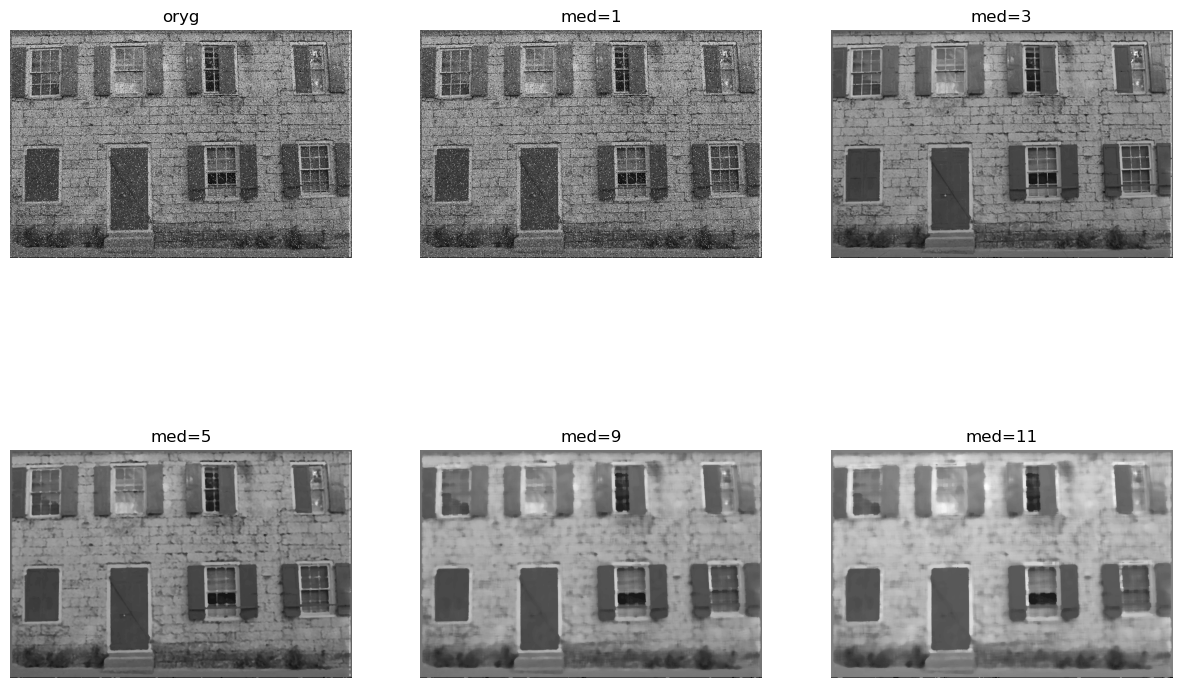

In [22]:
import random
  
def add_noise(img):
    '''
    adding noise to an image
    '''
    row , col = img.shape
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 255

    number_of_pixels = random.randint(300 , 10000)

    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 0
            
    return img
  
img = cv2.imread('images/kodim01.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('images/kodim01.png', add_noise(img))

img = cv2.imread('images/kodim01.png',0)
lio = [img]
lin = ['oryg']
sizes = [1,3,5,9,11]

for i in range(0,len(sizes)):
    lio.append(cv2.medianBlur(img,sizes[i]))
    lin.append("med="+str(sizes[i]))
display_list(lio,3,lin)

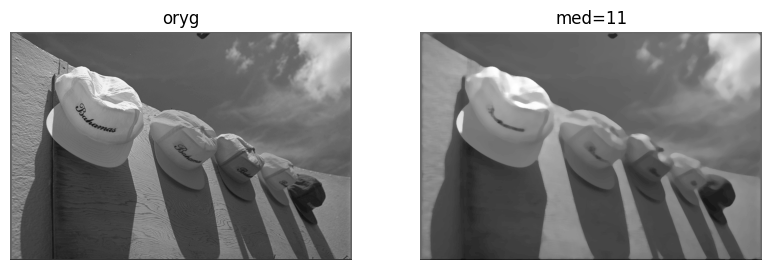

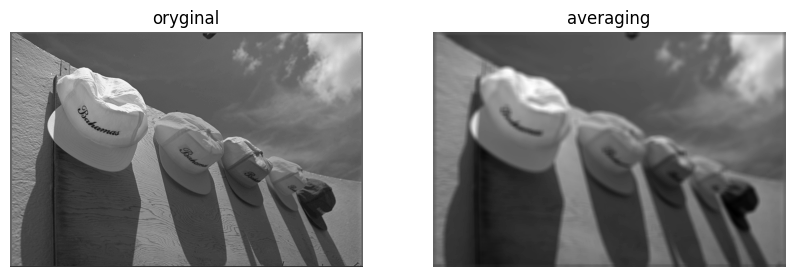

In [36]:
img = cv2.imread('images/kodim03.png',0)
lio = [img]
lin = ['oryg']

lio.append(cv2.medianBlur(img,11))
lin.append("med="+str(11))
display_list(lio,3,lin)

niegh = 5
mask = niegh*2 + 1
ret = cv2.blur(img,(mask, mask))
display_list([img,ret],2,['oryginal','averaging'])

## 5. Morfologic filters

Heights decetion

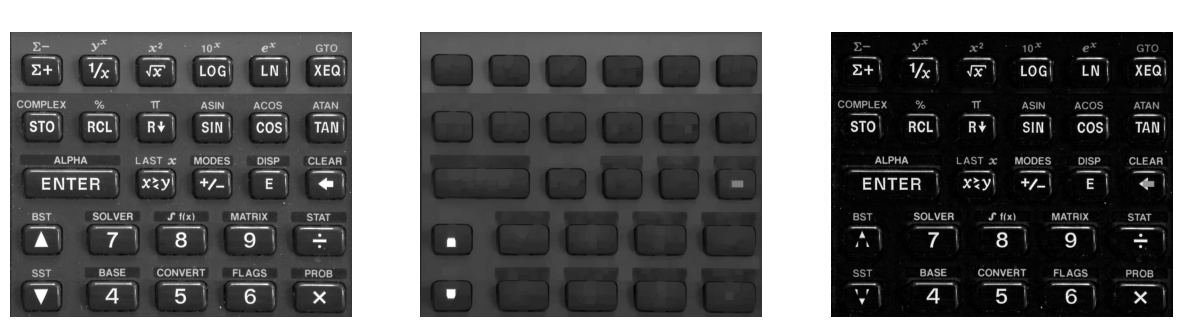

In [41]:
img = cv2.imread('images/calc.png',0)
size = 13
vars = np.ones((size,size),np.uint8)
open = cv2.morphologyEx(img,cv2.MORPH_OPEN,vars)
display_list([img, open, img-open],3)

Using opening and closing filters to separate darker and lighter pixels in image

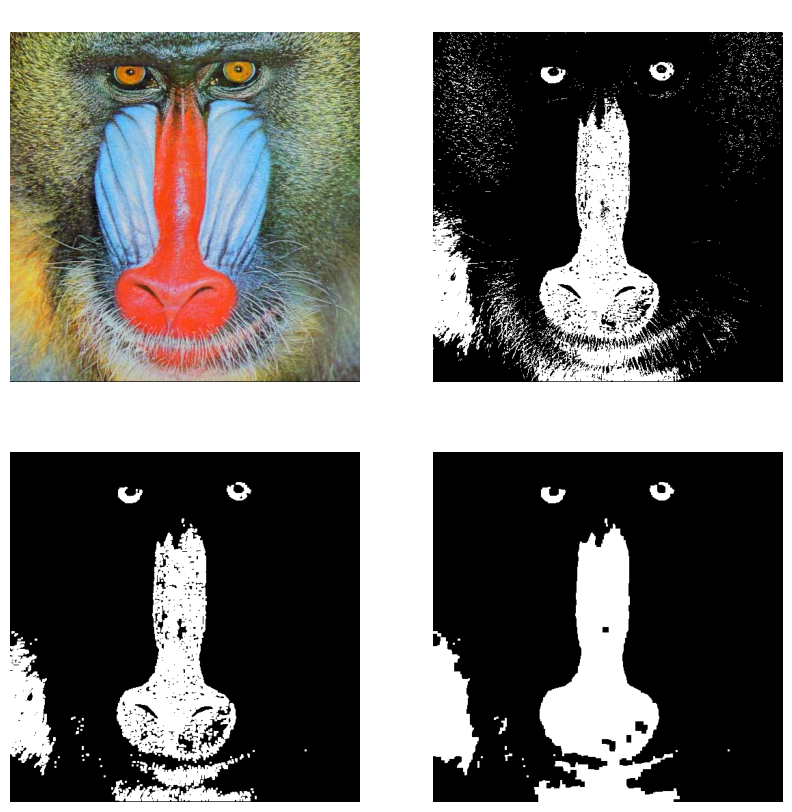

In [9]:
img = cv2.imread('images/baboon.jpg')
down = (0,0,180)
up = (200,200,250)
bin = cv2.inRange(img, down, up)
filt1 = cv2.morphologyEx(bin,cv2.MORPH_OPEN,np.ones((3,3),np.uint8))
filt2 = cv2.morphologyEx(filt1,cv2.MORPH_CLOSE,np.ones((7,7),np.uint8))
display_list([img,bin,filt1,filt2],2)